In [29]:
import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(2018)

In [30]:
train = []
test = []
validation = []
train_label = []
validation_label = []

In [31]:
with h5py.File('Xception_feature_v1.h5', 'r') as h:
    train.append(np.array(h['train']))
    validation.append(np.array(h['validation']))
    test.append(np.array(h['test']))
    train_label = np.array(h['train_label'])
    validation_label = np.array(h['validation_label'])

In [32]:
train = np.concatenate(train, axis=1)
validation = np.concatenate(validation, axis=1)
test = np.concatenate(test, axis=1)
# print(X_test)

In [33]:
from keras.models import *
from keras.layers import *

In [34]:
input_tensor = Input(train.shape[1:])
x = input_tensor
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
# 使用Dropout随机丢掉一部分特征
x = Dropout(0.5)(x)
# 使用sigmoid作为激活函数
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x)

# for layer in base_model.layers:
#     layer.trainable = False

# for layer in model.layers[:2]:
#    layer.trainable = False
# for layer in model.layers[2:]:
#    layer.trainable = True

for i, layer in enumerate(model.layers):
   print(i, layer.name)
    
# 使用RMSprop优化器
model.compile(optimizer='RMSprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

0 input_2
1 dense_4
2 dropout_3
3 dense_5
4 dropout_4
5 dense_6


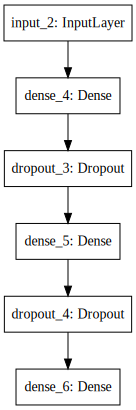

In [35]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [36]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
earlystopping = EarlyStopping(monitor='val_loss',patience=0,verbose=0,mode='auto') 
checkpointer = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True)

In [37]:
hist = model.fit(train, train_label,
          epochs=30,
          batch_size=128,
          validation_data=(validation, validation_label), callbacks=[checkpointer, earlystopping])

Train on 19940 samples, validate on 4985 samples
Epoch 1/30
19940/19940 [==============================] - 7s 373us/step - loss: 0.0623 - acc: 0.9835 - val_loss: 0.0171 - val_acc: 0.9958

Epoch 00001: val_loss improved from inf to 0.01714, saving model to weights.hdf5
Epoch 2/30
19940/19940 [==============================] - 7s 368us/step - loss: 0.0292 - acc: 0.9936 - val_loss: 0.0158 - val_acc: 0.9954

Epoch 00002: val_loss improved from 0.01714 to 0.01576, saving model to weights.hdf5
Epoch 3/30
19940/19940 [==============================] - 7s 358us/step - loss: 0.0253 - acc: 0.9937 - val_loss: 0.0118 - val_acc: 0.9954

Epoch 00003: val_loss improved from 0.01576 to 0.01179, saving model to weights.hdf5
Epoch 4/30
19940/19940 [==============================] - 7s 364us/step - loss: 0.0225 - acc: 0.9950 - val_loss: 0.0185 - val_acc: 0.9954

Epoch 00004: val_loss did not improve


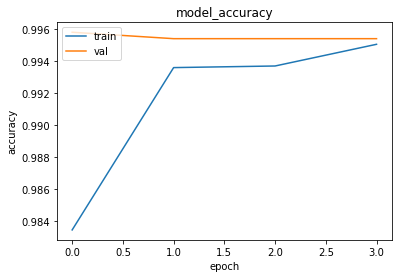

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure()  
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
#设置标题  
plt.title('model_accuracy') 
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train', 'val'], loc='upper left')
plt.show()

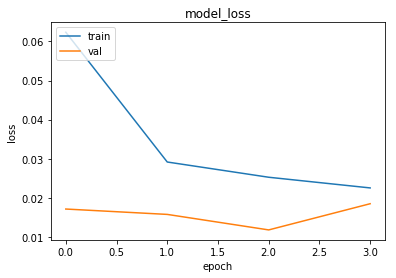

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure()  
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
#设置标题  
plt.title('model_loss') 
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'val'], loc='upper left')
plt.show()